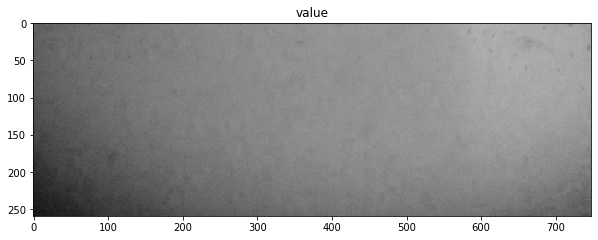

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import imutils

original = cv.imread("./../Egg_Counting/deployment/node10.jpg")
# original = imutils.rotate(original,180)
h = original.shape[0]
w = original.shape[1]
original = original[765:h-0,20:w]

plt.figure(figsize=(10,10))

hsv = cv.cvtColor(original, cv.COLOR_BGR2HSV)
hue ,saturation ,value = cv.split(hsv)

plt.title('value')
plt.imshow(value, cmap="gray", vmin=0, vmax=255)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


objects number is: 0


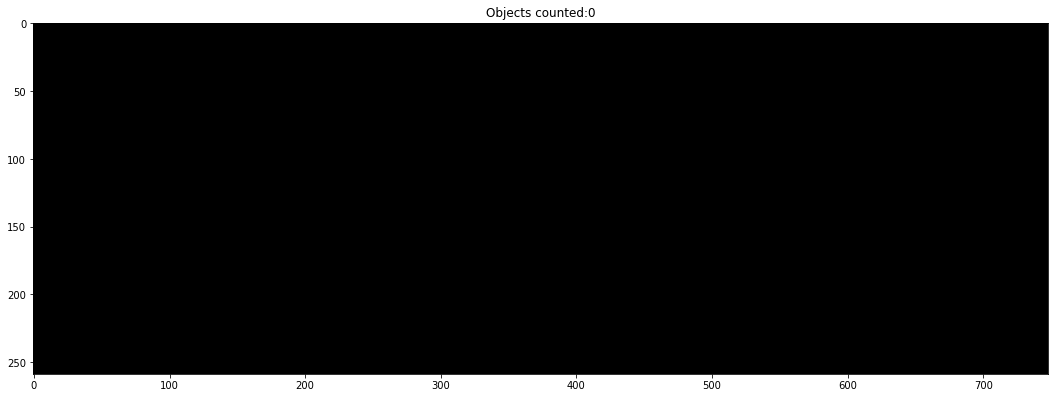

In [5]:
##### Local adaptative threshold

thresh = cv.adaptiveThreshold(value, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 255, 17)
thresh = cv.bitwise_not(thresh)
# plt.figure(figsize=(10,10))
# plt.title('Local adapatative Threshold')
# plt.imshow(thresh, cmap="gray", vmin=0, vmax=255)

# Find image contours
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Maximum blobs size
threshold_blobs_area = 17

# Loop over all contours and fill draw white color for area smaller than threshold.
for i in range(1, len(contours)):
    index_level = int(hierarchy[0][i][1])
    if index_level <= i:
        cnt = contours[i]
        area = cv.contourArea(cnt)
#         print(area)
        if area <= threshold_blobs_area:
            # Draw white color for small blobs
            cv.drawContours(thresh, [cnt], -1, 0, -1, 1)

# plt.figure(figsize=(10,10))
# plt.imshow(thresh, cmap="gray", vmin=0, vmax=255)
# cv2.waitKey(0)

# Dilatation et erosion
kernel = np.ones((15,15), np.uint8)
img_dilation = cv.dilate(thresh, kernel, iterations=1)
img_erode = cv.erode(img_dilation,kernel, iterations=1)
# clean all noise after dilatation and erosion
# img_erode = cv.medianBlur(img_erode, 9)
img_erode = cv.medianBlur(img_erode, 5)
# plt.figure(figsize=(20,20))
# plt.subplot(221)
# plt.title('Dilatation + erosion')
# plt.imshow(img_erode, cmap="gray", vmin=0, vmax=255)

ret, labels = cv.connectedComponents(img_erode)
label_hue = np.uint8(179 * labels / np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0
if ret == 0:
    ret = 2
elif ret == 1:
    ret = 2
else:
    ret = ret
plt.figure(figsize=(40,40))
plt.subplot(222)
plt.title('Objects counted:'+ str(ret-2))
plt.imshow(labeled_img)
print('objects number is:', ret-2)
plt.show()